In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image Generation with Imagen on Vertex AI

## Overview

[Imagen on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview) 

## Getting Started

### Install Vertex AI SDK, other packages and their dependencies

In [5]:
%pip install --upgrade google-cloud-aiplatform>=1.31.0

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [6]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>

### Define Google Cloud project information (Local only)

If you are running this notebook on Google Colab, you need to define Google Cloud project information to be used. In the following cell, you will define the information, import Vertex AI package, and initialize it. This step is also not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).

In [2]:
# # Define project information
# PROJECT_ID = "wmt-7fbls2a91f025anb93e025b02g" # @param {type:"string"}
# LOCATION = "us-central1" # @param {type:"string"}

# # Initialize Vertex AI
# import vertexai
# vertexai.init(project=PROJECT_ID, location=LOCATION)

### Load the image generation model

The model names from Vertex AI Imagen have two components: model name and version number. The naming convention follow this format: `<model-name>@<version-number>`. For example, `imagegeneration@002` represent the version **002** of the **imagegeneration** model.



In [60]:
from vertexai.preview.vision_models import ImageGenerationModel

image_generation_model = ImageGenerationModel.from_pretrained("imagegeneration@002")

###  Generate images from text

In this section, you will use the image generation model to generate images from text.

In [221]:
prompt1="A 4k photo of coffee beans in a kitchen on a wooden surface"

In [222]:
generated_images = image_generation_model.generate_images(prompt=prompt1,
                                                          number_of_images=3,
                                                          seed=24)

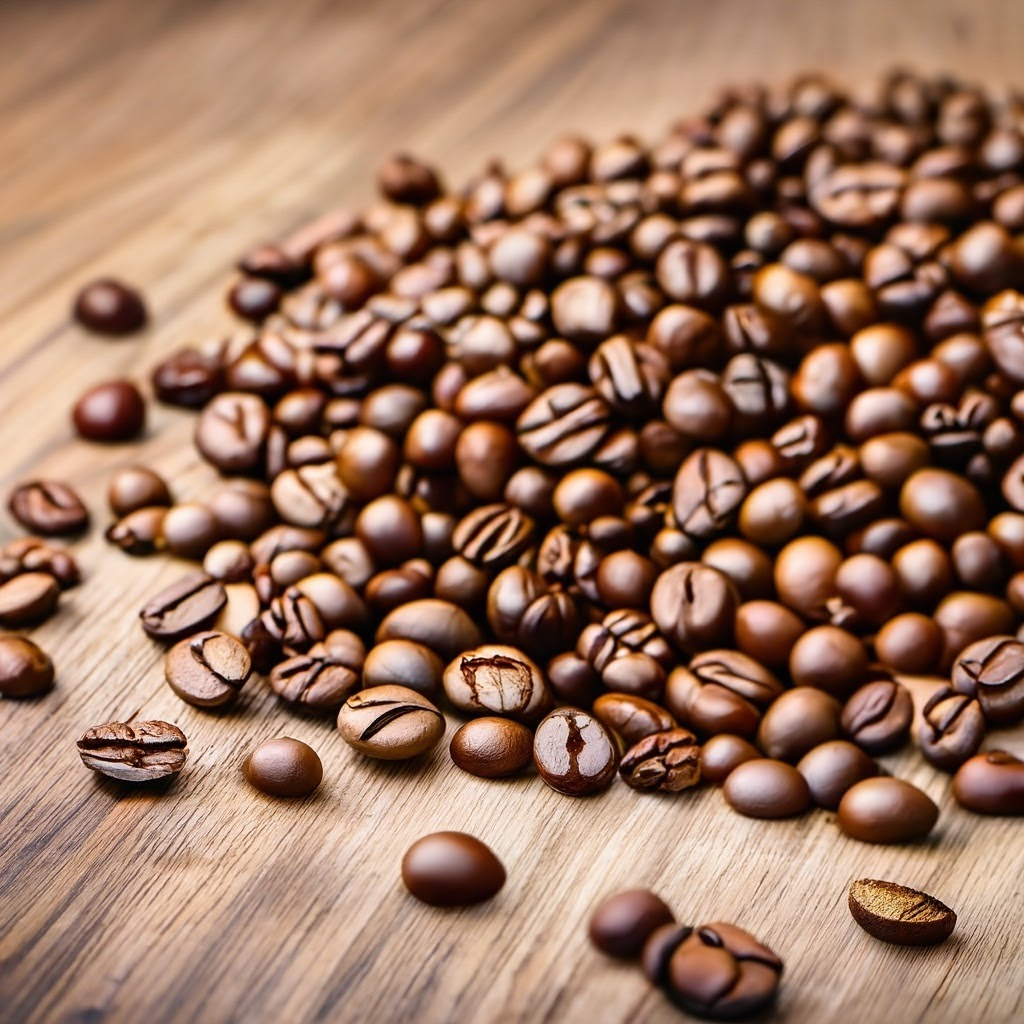

In [223]:
generated_images.images[0].show()

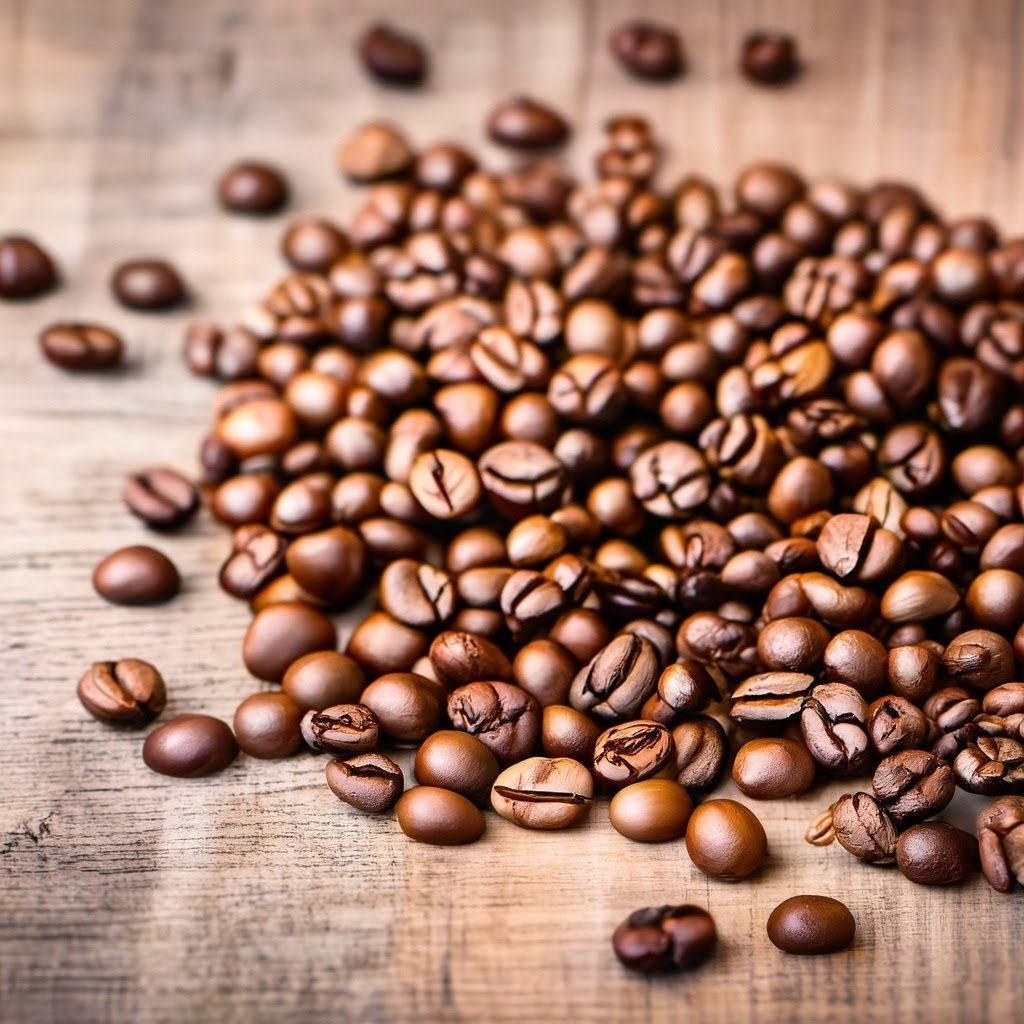

In [224]:
generated_images.images[1].show()

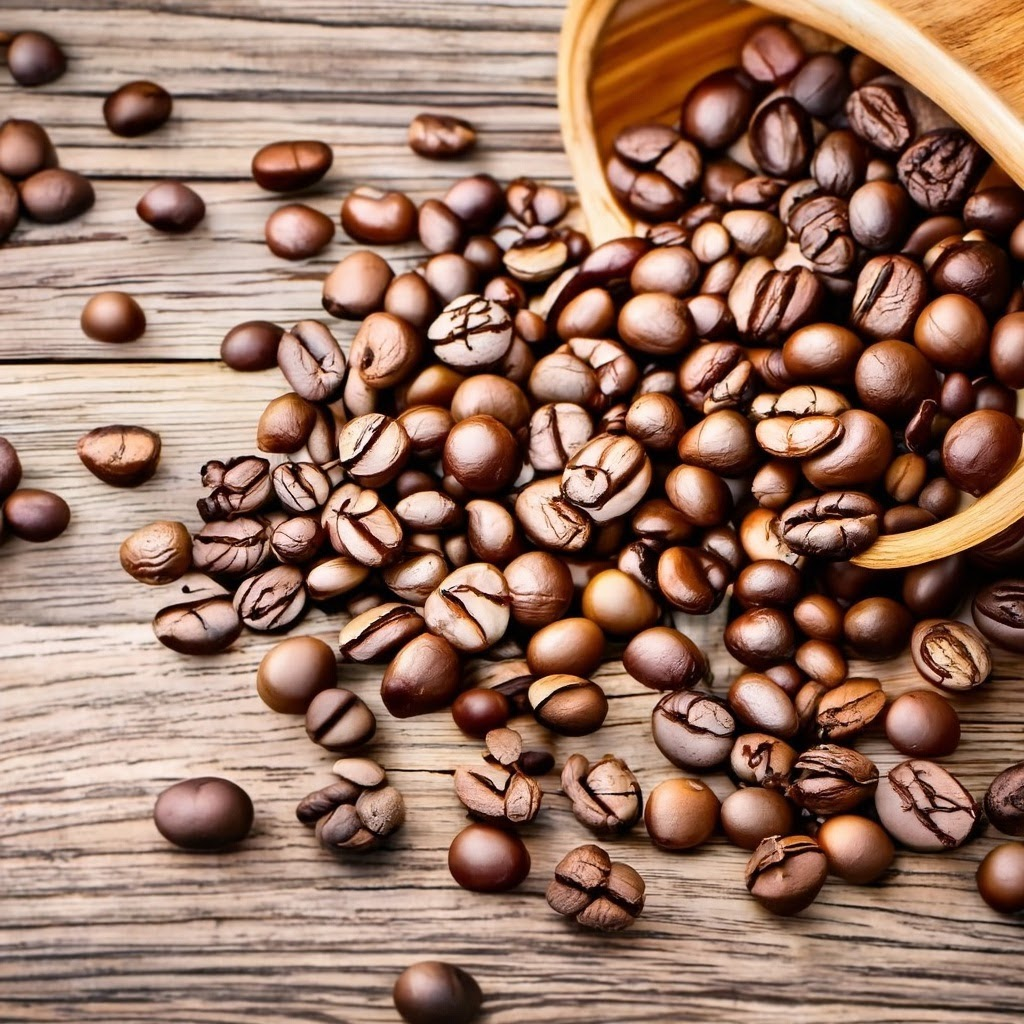

In [225]:
generated_images.images[2].show()

###  Edit images

In this section, you will use the image generation model to edit images.

In [226]:
edited_image = image_generation_model.edit_image(prompt="cherries",
                                                 base_image=generated_images.images[0],
                                                 number_of_images=3,
                                                 seed=24)

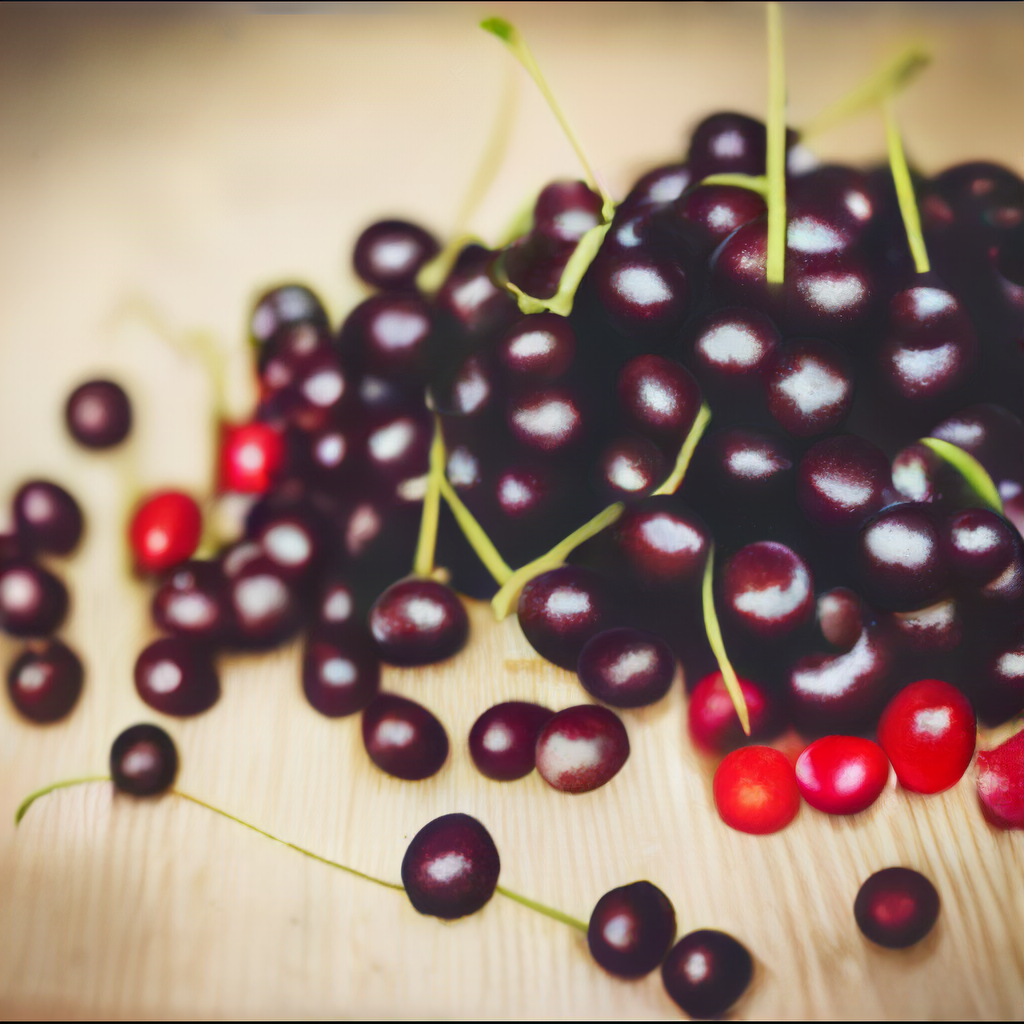

In [227]:
edited_image.images[0].show()

###  Upscale images

In this section, you will use the image generation model to upscale images.

In [ ]:
from vertexai.preview.vision_models import Image

# Load the image file as Image object
input_image = Image.load_from_file("")

In [ ]:
upscaled_image = image_generation_model.upscale_image(image=input_image,
                                                    new_size=2048)

In [ ]:
upscaled_image.images[0].show()